# Lesson 3: Reflection and Blogpost Writing(写博客和评论)

## Setup

In [2]:
llm_config = {"model": "gpt-3.5-turbo"}

## The task!

In [3]:
# task = '''
#         Write a concise but engaging blogpost about
#        DeepLearning.AI. Make sure the blogpost is
#        within 100 words.
#        '''
task = '''
        撰写一篇简洁但引人入胜的博客，内容涉及
       DeepLearning.AI. 确保博客100 字以内。
       '''


## Create a writer agent

In [4]:
import autogen

# writer = autogen.AssistantAgent(
#     name="Writer",
#     system_message="You are a writer. You write engaging and concise " 
#         "blogpost (with title) on given topics. You must polish your "
#         "writing based on the feedback you receive and give a refined "
#         "version. Only return your final work without additional comments.",
#     llm_config=llm_config,
# )

#先准备一个writer agent
writer = autogen.AssistantAgent(
    name="写手",
    system_message="你是一位作家。你写的文章（带标题）引人入胜，言简意赅。" 
        "你必须根据收到的反馈意见润色你的文章，并给出一个优化后的完善的版本。 "
        "只 return 你的最终作品,不要添加其他的自主内容。",
    llm_config=llm_config,
)

In [5]:
reply = writer.generate_reply(messages=[{"content": task, "role": "user"}])

In [6]:
print(reply)

标题：探索深度学习：DeepLearning.AI

文章：深度学习正在改变我们的世界。作为人工智能的一个关键领域，DeepLearning.AI 为其提供了强大的支持。无论是计算机视觉、自然语言处理还是增强学习，深度学习都展现出强大的能力。通过参与 DeepLearning.AI 课程，你将深入了解神经网络、深度学习算法等概念，掌握实践技能。不仅如此，这也为你进入人工智能领域打下了坚实的基础。让我们一起探索深度学习的未来吧！


## Adding reflection (添加评论（反馈）)

Create a critic agent to reflect on the work of the writer agent.   
创建评论员agent，对写手agent的工作进行反思。

In [7]:
# critic = autogen.AssistantAgent(
#     name="Critic",
#     is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
#     llm_config=llm_config,
#     system_message="You are a critic. You review the work of "
#                 "the writer and provide constructive "
#                 "feedback to help improve the quality of the content.",
# )

critic = autogen.AssistantAgent(
    name="评论家",
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    llm_config=llm_config,
    system_message="你是一名著名的评论家。"
    "你将会对写手的作品进行点评，并提供建设性意见来帮助他提高文章的质量",
)

In [8]:
res = critic.initiate_chat(
    recipient=writer,
    message=task,# 启动对话的语句（任务）
    max_turns=3,
    summary_method="last_msg"
)

评论家 (to 写手):


        撰写一篇简洁但引人入胜的博客，内容涉及
       DeepLearning.AI. 确保博客100 字以内。
       

--------------------------------------------------------------------------------
写手 (to 评论家):

标题：探索深度学习：DeepLearning.AI

文章：深度学习正在改变我们的世界。作为人工智能的一个关键领域，DeepLearning.AI 为其提供了强大的支持。无论是计算机视觉、自然语言处理还是增强学习，深度学习都展现出强大的能力。通过参与 DeepLearning.AI 课程，你将深入了解神经网络、深度学习算法等概念，掌握实践技能。不仅如此，这也为你进入人工智能领域打下了坚实的基础。让我们一起探索深度学习的未来吧！

--------------------------------------------------------------------------------
评论家 (to 写手):

这篇文章简练明了，生动地展示了深度学习对我们社会和技术领域的重要性。然而，我认为可以进一步发挥文章的吸引力和信息量，增加一些具体的例子或实际应用场景，让读者更容易理解深度学习的实际价值和应用需求。此外，可以在结尾处添加一些鼓舞人心的话语，鼓励读者积极参与到 DeepLearning.AI 的学习中来。希望这些建议对你的文章有所帮助，期待看到你的进一步写作成果！

--------------------------------------------------------------------------------
写手 (to 评论家):

标题：深度学习启示录：探索DeepLearning.AI

文章：深度学习是当今世界上最激动人心的技术之一，它影响着各个领域。以计算机视觉为例，深度学习技术已在人脸识别、自动驾驶等领域展现出巨大潜力。通过参与DeepLearning.AI 课程，你将学到实际操作技能，并了解到深度学习背后的原理。这不仅加深了你对技术的理解，也让你能更好地应用它。让我们一起踏上深度学习的征程，探索未知领域，开创未来！

------------------------

## Nested chat（嵌套聊天）

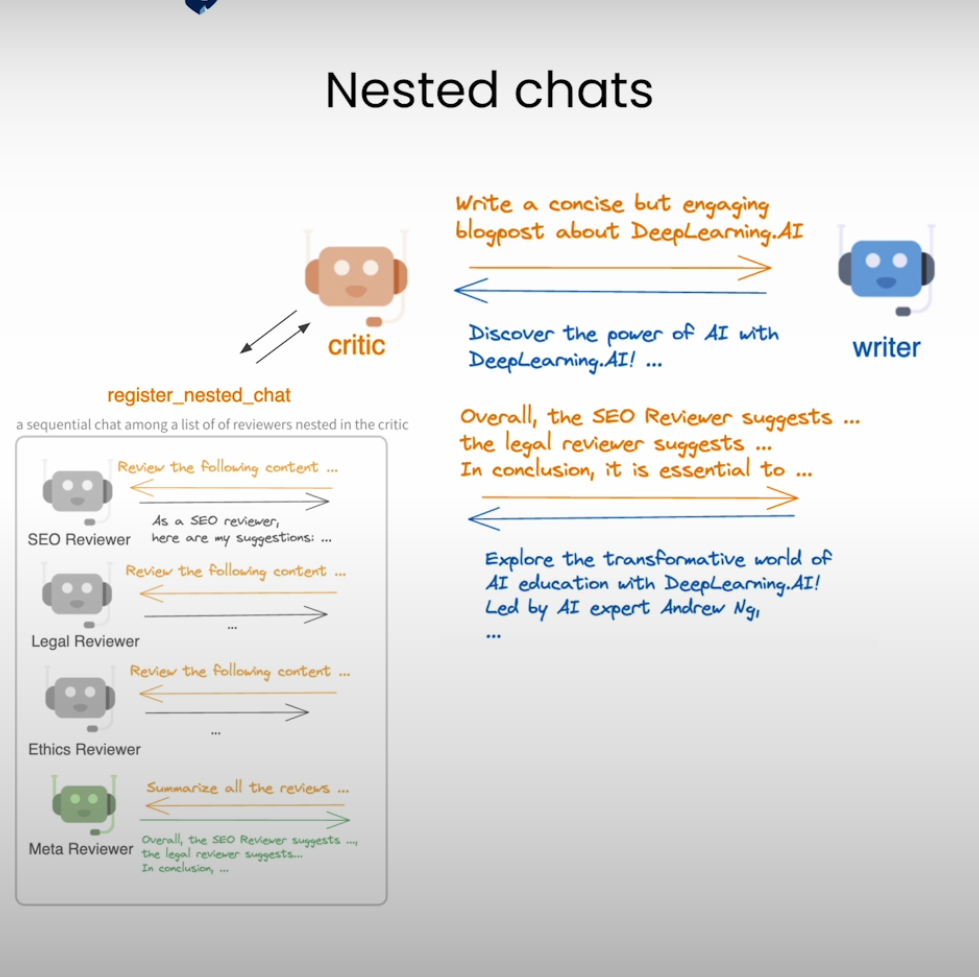

In [9]:
# SEO_reviewer = autogen.AssistantAgent(
#     name="SEO Reviewer",
#     llm_config=llm_config,
#     system_message="You are an SEO reviewer, known for "
#         "your ability to optimize content for search engines, "
#         "ensuring that it ranks well and attracts organic traffic. " 
#         "Make sure your suggestion is concise (within 3 bullet points), "
#         "concrete and to the point. "
#         "Begin the review by stating your role.",
# )
SEO_reviewer = autogen.AssistantAgent(
    name="搜索引擎优化审核员",
    llm_config=llm_config,
    system_message="""您是一名搜索引擎优化审核员.
        你以善于为搜索引擎优化内容、确保内容排名靠前、吸引有机流量而闻名。
        请确保你的建议简明扼要（不超过 3 个要点）、具体且切中要害。
        评论开始时，请说明你的角色。""",
)


In [10]:
legal_reviewer = autogen.AssistantAgent(
    name="法律审核员",
    llm_config=llm_config,
    system_message="""您是一名法律审核员。
      你以有能力确保内容符合法律规定、不存在任何潜在法律问题而闻名。 
      请确保你的建议简明扼要（不超过 3 个要点）、具体且切中要害。
      审查开始时，请说明你的角色。""",
)
# legal_reviewer = autogen.AssistantAgent(
#     name="Legal 评论家",
#     llm_config=llm_config,
#     system_message="You are a legal reviewer, known for "
#         "your ability to ensure that content is legally compliant "
#         "and free from any potential legal issues. "
#         "Make sure your suggestion is concise (within 3 bullet points), "
#         "concrete and to the point. "
#         "Begin the review by stating your role.",
# )

In [11]:
ethics_reviewer = autogen.AssistantAgent(
    name="道德审查员",
    llm_config=llm_config,
    system_message="""您是一名道德审查员。
        你以有能力确保内容符合道德规范且不存在任何潜在道德问题而闻名。
        请确保你的建议简明扼要（不超过 3 个要点）、具体且切中要害。
        审查开始时，请说明你的职责。""",
)
# ethics_reviewer = autogen.AssistantAgent(
#     name="Ethics Reviewer",
#     llm_config=llm_config,
#     system_message="You are an ethics reviewer, known for "
#         "your ability to ensure that content is ethically sound "
#         "and free from any potential ethical issues. " 
#         "Make sure your suggestion is concise (within 3 bullet points), "
#         "concrete and to the point. "
#         "Begin the review by stating your role. ",
# )

In [12]:
meta_reviewer = autogen.AssistantAgent(
    name="审核员主管",
    llm_config=llm_config,
    system_message="""您是审核员主管，你对其他审核员的作品进行升级和审阅，并对内容提出最终建议。""",
)
# meta_reviewer = autogen.AssistantAgent(
#     name="Meta Reviewer",
#     llm_config=llm_config,
#     system_message="You are a meta reviewer, you aggragate and review "
#     "the work of other reviewers and give a final suggestion on the content.",
# )

## Orchestrate the nested chats to solve the task  
协调嵌套聊天以解决任务

In [17]:
def reflection_message(recipient, messages, sender, config):
    return f'''审查以下内容
            \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}'''
# 按照 搜索引擎优化审核员 --> 法律审核员 --> 道德审查员-->审核员主管 的顺序依次审查
review_chats = [
    {
     "recipient": SEO_reviewer, 
     "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "仅以 JSON 对象的格式返回审查结果  :"
        "{'审查员': '', '审查结果': ''}. 这里的 审查员 应该是你自己的角色",},
     "max_turns": 1},
    {
    "recipient": legal_reviewer, "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "仅以 JSON 对象的格式返回审查结果  :"
        "{'审查员': '', '审查结果': ''}.",},
     "max_turns": 1},
    {"recipient": ethics_reviewer, "message": reflection_message, 
     "summary_method": "reflection_with_llm",
     "summary_args": {"summary_prompt" : 
        "仅以 JSON 对象的格式返回审查结果  :"
        "{'审查员': '', '审查结果': ''}",},
     "max_turns": 1},
     {"recipient": meta_reviewer, 
      "message": "对所有审查员的反馈意见进行汇总，并对写作提出最终建议。", 
     "max_turns": 1},
]
# def reflection_message(recipient, messages, sender, config):
#     return f'''Review the following content. 
#             \n\n {recipient.chat_messages_for_summary(sender)[-1]['content']}'''

# review_chats = [
#     {
#      "recipient": SEO_reviewer, 
#      "message": reflection_message, 
#      "summary_method": "reflection_with_llm",
#      "summary_args": {"summary_prompt" : 
#         "Return review into as JSON object only:"
#         "{'Reviewer': '', 'Review': ''}. Here Reviewer should be your role",},
#      "max_turns": 1},
#     {
#     "recipient": legal_reviewer, "message": reflection_message, 
#      "summary_method": "reflection_with_llm",
#      "summary_args": {"summary_prompt" : 
#         "Return review into as JSON object only:"
#         "{'Reviewer': '', 'Review': ''}.",},
#      "max_turns": 1},
#     {"recipient": ethics_reviewer, "message": reflection_message, 
#      "summary_method": "reflection_with_llm",
#      "summary_args": {"summary_prompt" : 
#         "Return review into as JSON object only:"
#         "{'reviewer': '', 'review': ''}",},
#      "max_turns": 1},
#      {"recipient": meta_reviewer, 
#       "message": "Aggregrate feedback from all reviewers and give final suggestions on the writing.", 
#      "max_turns": 1},
# ]


####   register revirew chat to the critic agent as a nested chat  

将revirew聊天list注册为critic agent  的嵌套聊天

In [18]:
critic.register_nested_chats(
    review_chats,
    trigger=writer,# 触发器是 writer(写手)，这样的话，无论什么时候写手写了东西穿给critic
                   #都会自动经过一系列的审核
)

**Note**: You might get a slightly different response than what's shown in the video. Feel free to try different task.

注册完了，就可以初始化critic 和写手之间的聊天了

In [19]:
res = critic.initiate_chat(
    recipient=writer,
    message=task,
    max_turns=2,
    summary_method="last_msg"
)

评论家 (to 写手):


        撰写一篇简洁但引人入胜的博客，内容涉及
       DeepLearning.AI. 确保博客100 字以内。
       

--------------------------------------------------------------------------------
写手 (to 评论家):

标题：探索深度学习：DeepLearning.AI

文章：深度学习正在改变我们的世界。作为人工智能的一个关键领域，DeepLearning.AI 为其提供了强大的支持。无论是计算机视觉、自然语言处理还是增强学习，深度学习都展现出强大的能力。通过参与 DeepLearning.AI 课程，你将深入了解神经网络、深度学习算法等概念，掌握实践技能。不仅如此，这也为你进入人工智能领域打下了坚实的基础。让我们一起探索深度学习的未来吧！

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
评论家 (to 搜索引擎优化审核员):

审查以下内容
            

 标题：探索深度学习：DeepLearning.AI

文章：深度学习正在改变我们的世界。作为人工智能的一个关键领域，DeepLearning.AI 为其提供了强大的支持。无论是计算机视觉、自然语言处理还是增强学习，深度学习都展现出强大的能力。通过参与 DeepLearning.AI 课程，你将深入了解神经网络、深度学习算法等概念，掌握实践技能。不仅如此，这也为你进入人工智能领域打下了坚实的基础。让我们一起探索深度学习的未来吧！

----------------------------------------------------------------------

## Get the summary

In [22]:
print(res.summary)

标题：探索深度学习：深入了解 DeepLearning.AI

文章：深度学习，作为人工智能的关键领域之一，不断影响着我们的生活。参与 DeepLearning.AI 课程将带你深入探索神经网络、深度学习算法等核心概念，为未来的人工智能之旅奠定坚实基础。然而，在追求技术进步的同时，我们也应关注数据隐私、伦理等重要议题。让我们一起探索深度学习的无限可能，并在创新的道路上秉持客观、道德的态度。点击链接，开启学习之旅！
